In [38]:
import glob
import os.path as osp
import pickle
import random
import numpy as np
import json
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import DataLoader
import torchvision
from torchvision import models, transforms
import matplotlib.pyplot as plt
from datasets.dataset import load_data

In [28]:
dataset = load_data(kinds=["ADNI2"], classes=["CN", "AD"])
len(dataset)

258

In [33]:
from sklearn.model_selection import train_test_split

train_datadict, val_datadict = train_test_split(dataset, test_size=0.3, shuffle=True)

In [40]:
class ImageTransform():
    def __init__(self):
        self.data_transform = transforms.Compose([
            transforms.ToTensor()
        ])
    
    def __call__(self, img):
        return self.data_transform(img)

In [44]:
class BrainDataset(data.Dataset):

    def __init__(self, data_dict, transform=None):
        self.file_list = []
        self.labels = []
        for data in data_dict:
            self.file_list.append(data["path"])
            self.labels.append(data["label"])

        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, index):
        img_path = self.file_list[index]
        label = self.labels[index]
        with open(img_path, 'rb') as rf:
            img = pickle.load(rf, encoding='latin1')

        img_transformed = self.transform(img)
        return img_transformed, label

    def __call__(self, index):
        return self.__getitem__(index)



In [49]:
train_dataset = BrainDataset(data_dict=train_datadict, transform=ImageTransform())
val_dataset = BrainDataset(data_dict=val_datadict, transform=ImageTransform())

print("size of the training dataset = ", len(train_dataset))
print("size of the training dataset = ", len(val_dataset))
print("training image size = {}, training label = {}".format(train_dataset(0)[0].size(), train_dataset(0)[1]))
print("test image size = {}, test label = {}".format(val_dataset(0)[0].size(), val_dataset(0)[1]))

size of the training dataset =  180
size of the training dataset =  78
training image size = torch.Size([80, 80, 96]), training label = AD
test image size = torch.Size([80, 80, 96]), test label = CN


AD


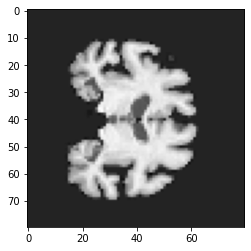

In [51]:
idx = 70
image, label = train_dataset(idx)
print(label)
#imge = np.clip(image, 0, None)
plt.imshow(np.flip(image.numpy().transpose(2,1,0)[50],0), cmap="gray")